In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pandas as pd

In [30]:
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [6]:
# Make text in plots match LaTeX
if not os.path.exists('Times New Roman.ttf'):
    !wget https://github.com/trishume/OpenTuringCompiler/raw/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
font_prop = fm.FontProperties(fname='Times New Roman.ttf')
plt.rcParams['font.family'] = font_prop.get_name()

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = [font_prop.get_name()] + plt.rcParams['font.serif']

In [34]:
COLOR_MAPPING = {
    'Normal': '#7fc97f',
    'De-duplicated': '#beaed4'
}

## Model Size

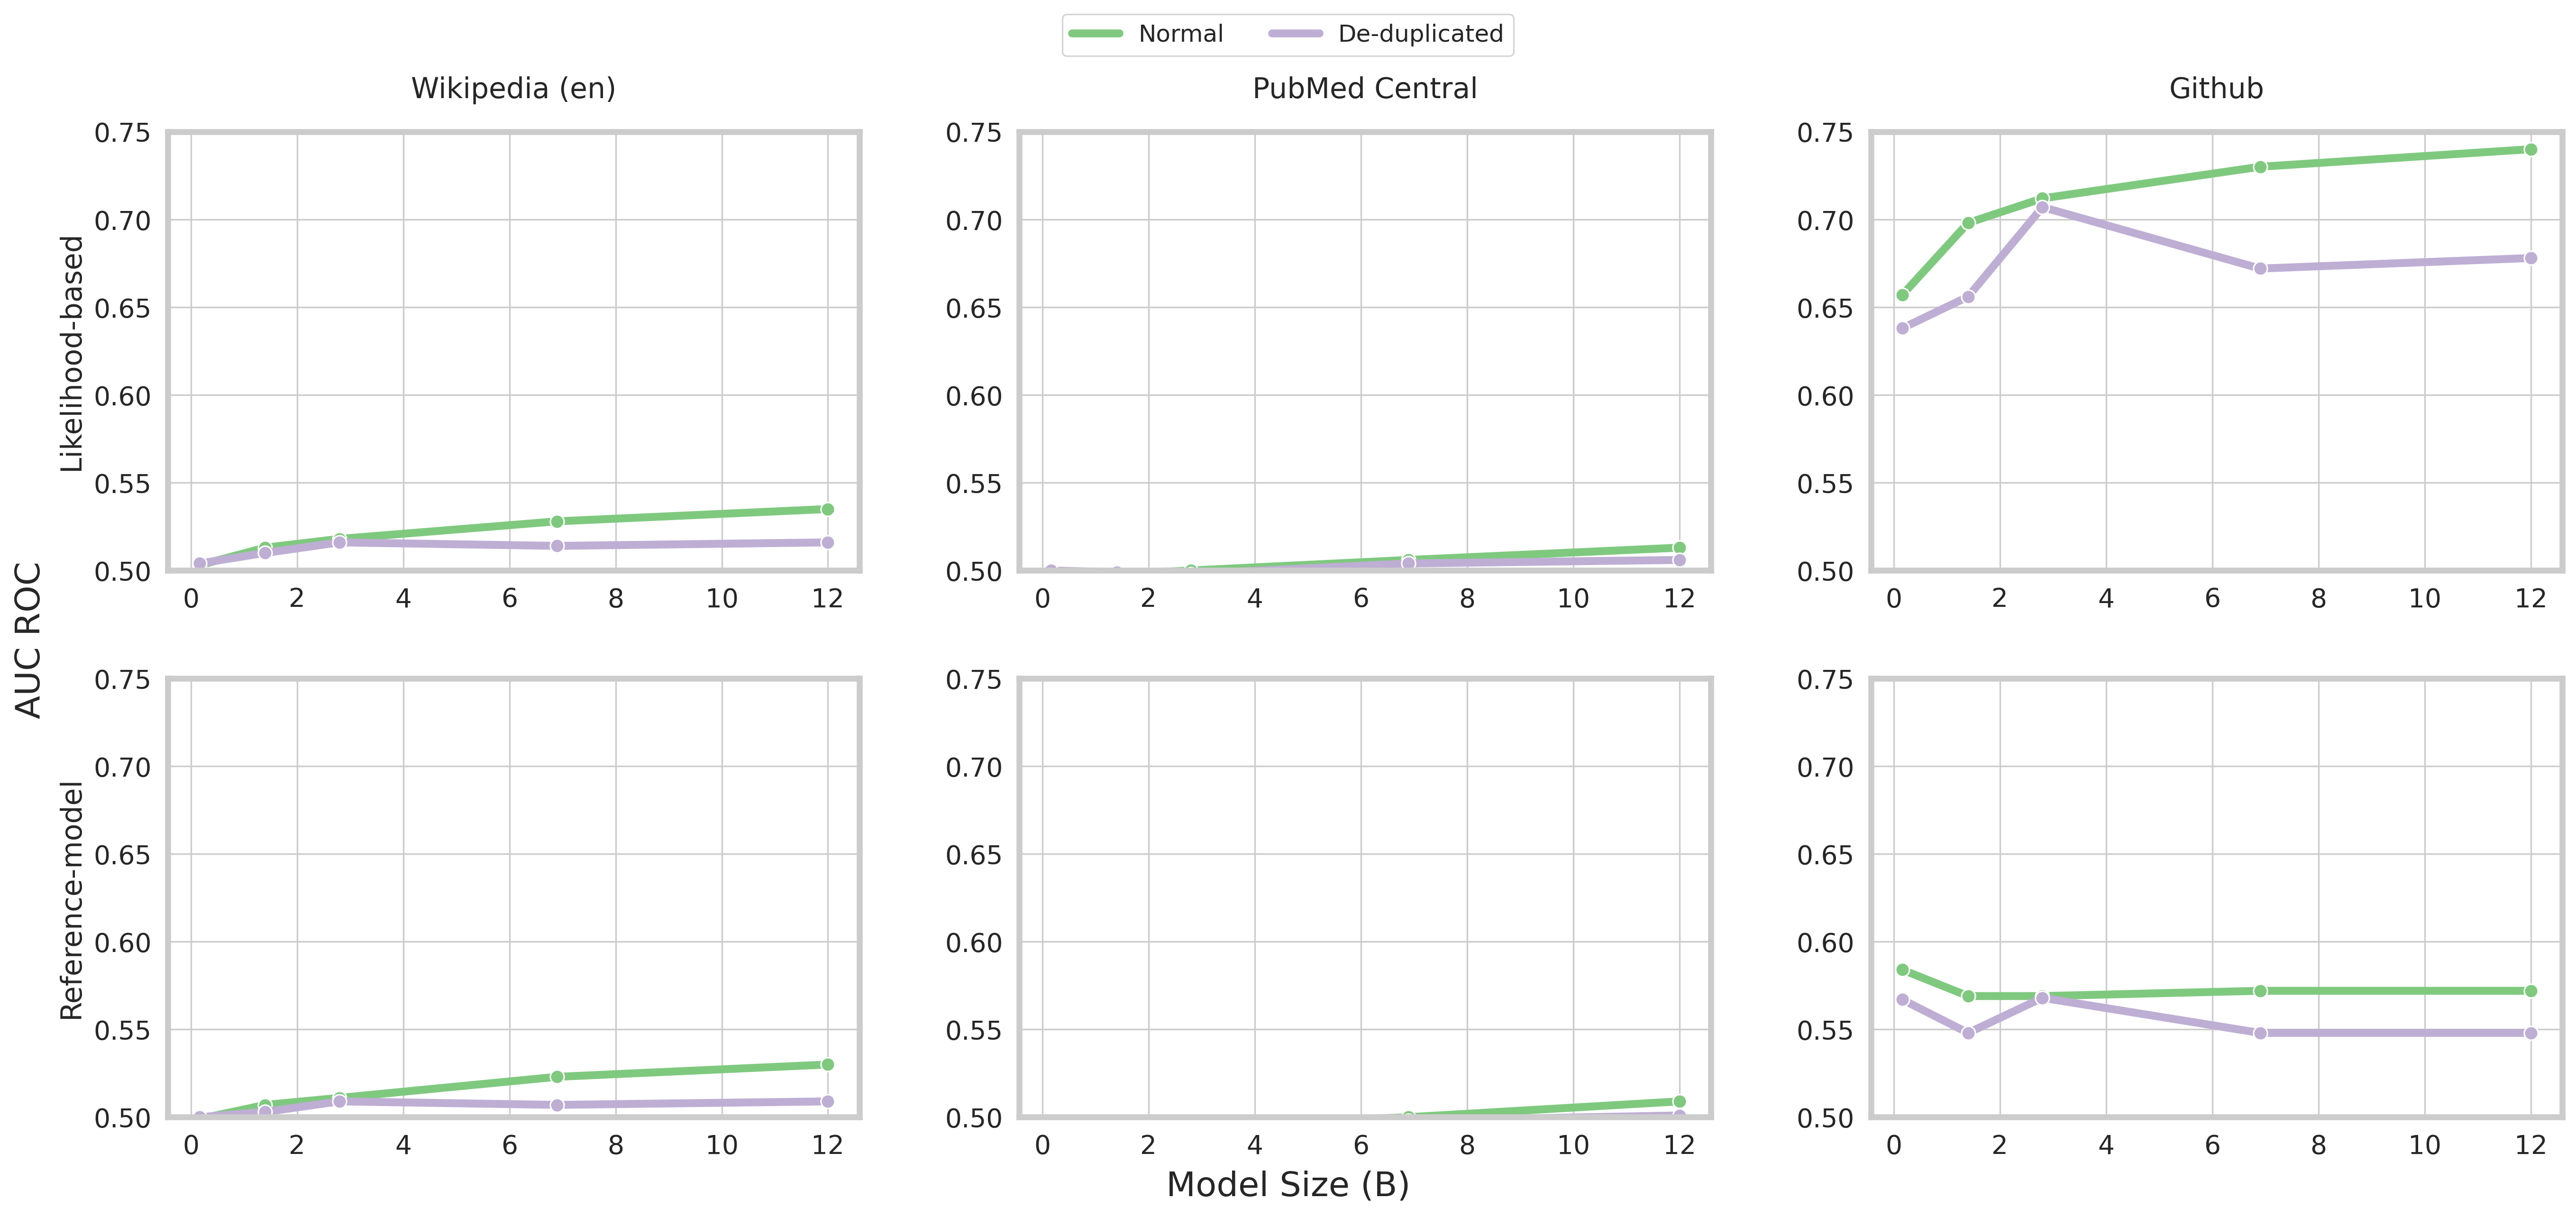

In [38]:
x = np.array([0.16, 1.4, 2.8, 6.9, 12])
metric = "tpr@lowfpr"
# AUC
aucs = [
    {'name': 'wiki_ll_auc', 'aucs': [.503,.513, .518,.528, .535]},
    {'name': 'wiki_ll_dedup_auc', 'aucs': [.504, .510, .516, .514 , .516]},
    {'name': 'wiki_lira_auc', 'aucs': [.499, .507, .511, .523, .530]},
    {'name': 'wiki_lira_dedup_auc', 'aucs': [.500, .503, .509, .507, .509]},

    {'name': 'pubmed_central_ll_auc', 'aucs': [.499, .498, .500, .506,.513]},
    {'name': 'pubmed_central_ll_dedup_auc', 'aucs': [.500, .499, .498, .504,.506]},
    {'name': 'pubmed_central_lira_auc', 'aucs': [.493, .493, .495, .500,.509]},
    {'name': 'pubmed_central_lira_dedup_auc', 'aucs': [.493, .494, .493, .498,.501]},

    {'name': 'github_ll_auc', 'aucs': [.657, .698, .712, .730,.740]},
    {'name': 'github_ll_dedup_auc', 'aucs': [.638, .656, .707, .672,.678]},
    {'name': 'github_lira_auc', 'aucs': [.584, .569, .569, .572,.572]},
    {'name': 'github_lira_dedup_auc', 'aucs': [.567, .548, .568, .548,.548]}
]

# dm_math_ll_auc = [.488, .490, .489, .489, .490]
# dm_math_lira_auc = [.491, .492, .492, .492, .494]

# TPR@lowFPR
# wiki_ll_tlf = [0.01100, 0.01300, 0.01600, 0.01100, 0.01500]
# wiki_lira_tlf = [0.00400, 0.01700, 0.00700, 0.01400, 0.01700]

# pubmed_central_ll_tlf = [0.01200, 0.01900, 0.01800, 0.01700, 0.01700]
# pubmed_central_lira_tlf = [0.01600, 0.00700, 0.01600, 0.01300, 0.01800]

# github_ll_tlf = [0.01300, 0.01200, 0.01400, 0.01500, 0.01900]
# github_lira_tlf = [0.00500, 0.00700, 0.01200, 0.01000, 0.01200]

# dm_math_ll_tlf = [0.01300, 0.01200, 0.01000, 0.01300, 0.01300]
# dm_math_lira_tlf = [0.00200, 0.00600, 0.00500, 0.00600, 0.00600]

# Set Seaborn style
sns.set(style="whitegrid")
sns.set_context("paper",
                font_scale = 1.5,
                rc={'lines.markersize': 7, 'lines.linewidth': 4, 'axes.linewidth': 3})


# Create a figure and axis
fig, axs = plt.subplots(2, 3, figsize=(18, 8),
                        gridspec_kw={'wspace':0.1,'hspace':0.1},
                        layout='constrained')

# Plot the data with Seaborn
for i, auc in enumerate(aucs):
    x_loc, y_loc = (i // 2) % 2, i // 4
    attack_name = 'De-duplicated' if '_dedup_' in auc['name'] else 'Normal'
    sns.lineplot(ax=axs[x_loc, y_loc], x=x, y=auc['aucs'], marker='o', color=COLOR_MAPPING[attack_name])
    axs[x_loc, y_loc].set_ylim(0.5, 0.75)

x_ax = fig.supxlabel('Model Size (B)')
y_ax = fig.supylabel('AUC ROC')
y_ax_ll = axs[0,0].set_ylabel('Likelihood-based')
y_ax_ref = axs[1,0].set_ylabel('Reference-model')

axs[0, 0].set_title('Wikipedia (en)', y=1.05)
axs[0, 1].set_title('PubMed Central', y=1.05)
axs[0, 2].set_title('Github', y=1.05)

# Custom legend (since seaborn does not recognize clash and labels separately for same attack names)
legend_lines, legend_names = [], []
for k, v in COLOR_MAPPING.items():
    legend_lines.append(Line2D([0], [0], color=v, lw=4))
    legend_names.append(k)

# Space adjustment
# plt.subplots_adjust(wspace=0.1, hspace=0)

# Legend plot
plt.figlegend(legend_lines, legend_names,
              loc='upper center', bbox_to_anchor=(0.5, 1.05),
              borderaxespad=0, ncol=2, fontsize=12)

# Save the figure
fig.savefig(f'model_size.pdf', bbox_inches='tight')

## Deduplication

In [ ]:
import argparse
import json 
import os
import datasets
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

dirs = ["/gscratch/h2lab/micdun/bff/deduped/pile_subsets/ngram_13/wikipedia_(en)",
        "/gscratch/h2lab/micdun/bff/deduped/pile_subsets/ngram_13/github",
        "/gscratch/h2lab/micdun/bff/deduped/pile_subsets/ngram_13/arxiv",
        "/gscratch/h2lab/micdun/bff/deduped/pile_subsets/ngram_13/pile_cc"]

# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, axs = plt.subplots(2, 2, figsize=(8,8))

for i, dir in enumerate(dirs):
    subset = os.path.split(dir)[-1]
    ngram = os.path.split(os.path.split(dir)[0])[-1]
    split = 'val'
    print(f"Loading for split {split}")
    shard_0 = datasets.load_dataset("json", data_files=os.path.join(dir, "0", f"{split}_text.jsonl.gz"), split="train")
    shard_1 = datasets.load_dataset("json", data_files=os.path.join(dir, "1", f"{split}_text.jsonl.gz"), split="train")
    assert shard_0["original"][0] == shard_1["original"][0] and shard_0["original"][1] == shard_1["original"][1]
    ngram_inclusion = [np.array(in0) | np.array(in1) for in0, in1 in zip(shard_0["ngram_inclusion"], shard_1["ngram_inclusion"])]
    individual_ngram_overlap = {text: np.mean(d) for text, d in zip(shard_0["original"], ngram_inclusion)}

    # Plot the histogram
    sns.histplot(ax=axs[i%2,i//2], data=individual_ngram_overlap.values(), bins=100)
    # plt.hist(individual_ngram_overlap_values, bins=100, range=(0, 1))

# Save the histograms
plt.savefig("ngram_overlap_hist.png")